### 0. Load and adjust DataFrame from *previous* Jupyther Notebook

I import the Coursera Data, in case the geolocator weren't reachable. Therefore I drop the coordinates. 

In [1]:
import pandas as pd
Canada = pd.read_pickle("./Canada_with_Coor.pkl")
Canada = Canada.drop(['Latitude', 'Longitude'], axis=1).reset_index(drop=True)

I import the csv from Coursera for the coordinates of the Postalcodes.

In [2]:
import pandas as pd
import requests

url="https://cocl.us/Geospatial_data"
Coursera_DataFrame=pd.read_csv(url)

I join those coordinates on the Postalcode of my Canada-DataFrame:

In [3]:
Canada = Canada.set_index('Postalcode').join(Coursera_DataFrame.set_index('Postal Code')).reset_index(drop=True)
Canada.head()

,Borough,Neighbourhood,Latitude,Longitude
0,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,Scarborough,"Guildwood]], Morningside, West Hill",43.763573,-79.188711
3,Scarborough,Woburn,43.770992,-79.216917
4,Scarborough,Cedarbrae,43.773136,-79.239476


As the assignments allows, I reduce my Canada-DataFrame to Boroughs only within Toronto and drop the column "Postalcodes":

In [4]:
Toronto = Canada[ Canada['Borough'].str.contains('Toronto', case=False)].reset_index(drop=True)  
Toronto # just 38 entries!

,Borough,Neighbourhood,Latitude,Longitude
0,East Toronto,The Beaches,43.676357,-79.293031
1,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,East Toronto,Studio District,43.659526,-79.340923
4,Central Toronto,Lawrence Park,43.728020,-79.388790
5,Central Toronto,Davisville North,43.712751,-79.390197
6,Central Toronto,North Toronto West,43.715383,-79.405678
7,Central Toronto,Davisville,43.704324,-79.388790
8,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
9,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049


### 1. Preanalyse the Location DataFrame of Toronto

The following analysis bases partly on the codes of the coursera-notebook "DP0701EN-3-3-2-Neighborhoods-New-York-py-v1.0". The assignment on Coursera states: *"Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data."*

In [6]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(Toronto['Borough'].unique()),
        Toronto.shape[0]))

The dataframe has 4 boroughs and 38 neighborhoods.


View the DataFrame and do plausibility checks.

In [7]:
Toronto.groupby("Borough").describe(include="all").T

Borough                  Central Toronto  \
Latitude      count                    9   
              unique                 NaN   
              top                    NaN   
              freq                   NaN   
              mean                43.702   
              std              0.0171464   
              min                43.6727   
              25%                43.6896   
              50%                43.7043   
              75%                43.7128   
              max                 43.728   
Longitude     count                    9   
              unique                 NaN   
              top                    NaN   
              freq                   NaN   
              mean               -79.399   
              std              0.0117277   
              min               -79.4169   
              25%               -79.4057   
              50%                  -79.4   
              75%               -79.3888   
              max               -79.3832   
Neighbourhood count                    9   
              unique                   9   
              top     North Toronto West   
              freq                     1   
              mean                   NaN   
              std                    NaN   
              min                    NaN   
              25%                    NaN   
              50%                    NaN   
              75%                    NaN   
              max                    NaN   

Borough                                     Downtown Toronto     East Toronto  \
Latitude      count                                       18                5   
              unique                                     NaN              NaN   
              top                                        NaN              NaN   
              freq                                       NaN              NaN   
              mean                                   43.6542          43.6694   
              std                                   0.011895       0.00856645   
              min                                    43.6289          43.6595   
              25%                                    43.6474          43.6627   
              50%                                    43.6523           43.669   
              75%                                    43.6615          43.6764   
              max                                    43.6796          43.6796   
Longitude     count                                       18                5   
              unique                                     NaN              NaN   
              top                                        NaN              NaN   
              freq                                       NaN              NaN   
              mean                                  -79.3837         -79.3247   
              std                                  0.0139419        0.0229939   
              min                                   -79.4226         -79.3522   
              25%                                   -79.3867         -79.3409   
              50%                                   -79.3817         -79.3216   
              75%                                   -79.3759         -79.3156   
              max                                   -79.3606          -79.293   
Neighbourhood count                                       18                5   
              unique                                      18                5   
              top     First Canadian Place, Underground city  Studio District   
              freq                                         1                1   
              mean                                       NaN              NaN   
              std                                        NaN              NaN   
              min                                        NaN              NaN   
              25%                                        NaN             

*Latitude* and *Longitude* are numerical, and *Neighbourhood* is textual. For all three variables their descriptive statistics look reasonably.

### 2. Explore Neighborhoods in Toronto

Locate Toronto to draw a map:

In [8]:
from geopy.geocoders import Nominatim 

location = Nominatim().geocode('Toronto, Canada') # as the center of the following map, convert the address of Toronto into latitude and longitude values

F:\Python\Miniconda\envs\py35\lib\site-packages\geopy\geocoders\osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


Draw Toronto and the Neighbourhoods:

In [9]:
import folium

map_toronto = folium.Map(location=[location.latitude, location.longitude], zoom_start=9)

# add markers to map
for lat, lng, neighborhood in zip(Toronto['Latitude'], Toronto['Longitude'], Toronto['Neighbourhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_toronto)  
    
map_toronto

Initialize the Foursquare API to explore venues for the coordinates of the neighbourhoods:

In [10]:
# Credentials are bind to my specific Foursquare app "courseras"

CLIENT_ID = 'YYWPX05AKBVYYQSJGV3WJAVDCP5YKZQQBQA5ZGV5SVRJU0S4' # your Foursquare ID
CLIENT_SECRET = 'S40VFJPSOU2Q1UGGFD2ACDVT5S3ZSJDMJO4KVPLH0KA00GT4' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version


Use the given function to process to all the neighborhoods in Toronto:

In [11]:
import requests

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        LIMIT = 100
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Create a dataframe *Toronto_venues* of the nearby venues:

In [12]:
# type your answer here
Toronto_venues = getNearbyVenues( Toronto.Neighbourhood, 
                                   Toronto.Latitude,
                                   Toronto.Longitude )
###Toronto_venues.to_pickle("./Toronto_venues.pkl");

The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront, Regent Park
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Dovercourt Village, Dufferin
Little Portugal, Trinity
Brockton, Exhibition Place, Parkdale Village
High Park, The 

Number of unique categories from the returned venues:

In [13]:
print('There are {} uniques categories.'.format(len(Toronto_venues['Venue Category'].unique())))

There are 234 uniques categories.


The value "Business reply mail Processing Centre969 Eastern" seems wired, so let's double check the name for the coordinates:

In [14]:
import requests
from pandas.io.json import json_normalize

params = {'format': 'jsonv2', 'lat': '43.662744', 'lon': '-79.321558'} # coordinates for "Business reply mail Processing Centre969 Eastern"
results = requests.get('https://nominatim.openstreetmap.org/reverse', params = params)

json_normalize( results.json() )


,address.building,address.city,address.city_district,address.country,address.country_code,address.neighbourhood,address.postcode,address.road,address.state,addresstype,...,importance,lat,licence,lon,name,osm_id,osm_type,place_id,place_rank,type
0,Canada Post,Toronto,Old Toronto,Canada,ca,Leslieville,M9L 1A2,Woodfield Road,Ontario,building,...,0,43.6620271,"Data © OpenStreetMap contributors, ODbL 1.0. h...",-79.3218924159303,Canada Post,43806922,way,86927498,30,yes


As the request shows, there is a building of the Canadian Post at the coordinates, as we expect. So the entry "Business reply mail Processing Centre969 Eastern" *could* be renamed. But we use coordinates, so the a named label doesn't matter.

### 3. Preprocess the Neighborhoods in Toronto for cluster analysis

At first, we transform the dataframe of venues in several steps:

In [15]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighbourhood'] = Toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_grouped = Toronto_onehot.groupby('Neighbourhood').mean().reset_index()
Toronto_grouped.head()

,Neighbourhood,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Women's Store,Yoga Studio
0,"Adelaide, King, Richmond",0.01,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.01,0.01,0.0000
1,Berczy Park,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0000
2,"Brockton, Exhibition Place, Parkdale Village",0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0000
3,Business reply mail Processing Centre969 Eastern,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0625
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.00,0.0,0.0,0.071429,0.071429,0.071429,0.142857,0.142857,0.142857,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0000


Create the new dataframe and display the top 10 venues for each neighborhood.

In [16]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [17]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create column names according to number of top venues: "1st, 2nd, 3rd, 4th ...
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = Toronto_grouped['Neighbourhood']

# sort venues per Neighbourhood
for ind in np.arange(Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

## 4. Cluster Neighborhoods

Drop the Neighbourhoods and show the **Dendrogram** as a hierarchical view of possible cluster:

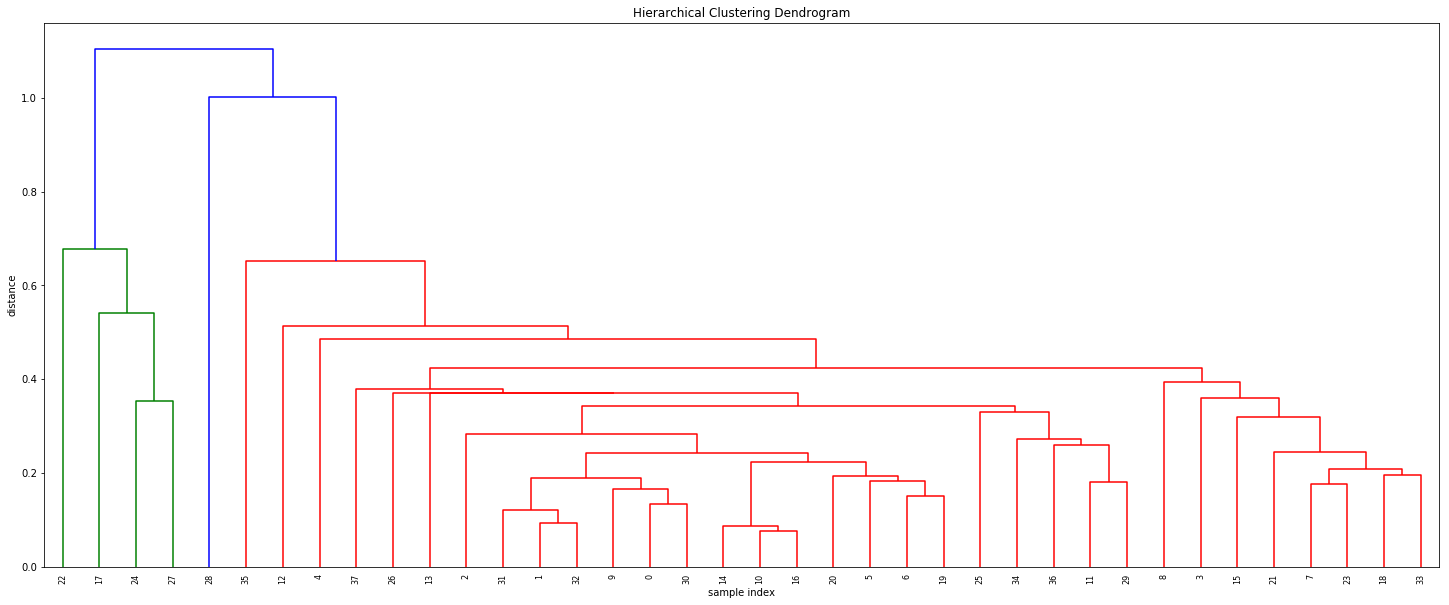

In [19]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline


Toronto_grouped_clustering = Toronto_grouped.drop('Neighbourhood', 1)

linkage_matrix = linkage(Toronto_grouped_clustering, 'ward')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    linkage_matrix,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

The dendogram show a specific hierarchical structure. For a sparse parametrization, I use three clusters:
One that contains the neighbourhood in **blue**, a cluster that contains the neighbourhoods in **green**, and the last cluster represents all remaining neighbourhoods in **red**.

Run the hierarchical cluster of the neighbourhoods. The returned cluster labels are added in the last column **Cluster Labels**: 

In [20]:
from scipy.cluster.hierarchy import fcluster

# generate cluster label
k=3 # number of Clusters
labels_ = fcluster(linkage_matrix, k, criterion='maxclust')

# add clustering labels
Toronto_merged = pd.DataFrame(Toronto_grouped['Neighbourhood'])
Toronto_merged['Cluster Labels'] = labels_
#print ( Toronto_merged )

# combine with sorted venues dataframe
Toronto_merged = Toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')\
                                .join( Toronto.set_index('Neighbourhood'), on='Neighbourhood')
Toronto_merged

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Borough,Latitude,Longitude
0,"Adelaide, King, Richmond",2,Coffee Shop,Café,Gym,Steakhouse,Thai Restaurant,American Restaurant,Restaurant,Bar,Hotel,Japanese Restaurant,Downtown Toronto,43.650571,-79.384568
1,Berczy Park,2,Coffee Shop,Cocktail Bar,Farmers Market,Café,Seafood Restaurant,Cheese Shop,Restaurant,Steakhouse,Beer Bar,Bakery,Downtown Toronto,43.644771,-79.373306
2,"Brockton, Exhibition Place, Parkdale Village",2,Coffee Shop,Breakfast Spot,Café,Nightclub,Pet Store,Performing Arts Venue,Burrito Place,Caribbean Restaurant,Climbing Gym,Convenience Store,West Toronto,43.636847,-79.428191
3,Business reply mail Processing Centre969 Eastern,2,Yoga Studio,Brewery,Recording Studio,Auto Workshop,Butcher,Skate Park,Burrito Place,Garden,Restaurant,Garden Center,East Toronto,43.662744,-79.321558
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",2,Airport Lounge,Airport Terminal,Airport Service,Harbor / Marina,Boat or Ferry,Sculpture Garden,Plane,Boutique,Airport Gate,Airport,Downtown Toronto,43.628947,-79.394420
5,"Cabbagetown, St. James Town",2,Coffee Shop,Restaurant,Park,Café,Pub,Italian Restaurant,Bakery,Pizza Place,Chinese Restaurant,Indian Restaurant,Downtown Toronto,43.667967,-79.367675
6,Central Bay Street,2,Coffee Shop,Café,Italian Restaurant,Bubble Tea Shop,Bar,Ice Cream Shop,Burger Joint,Japanese Restaurant,Sandwich Place,Salad Place,Downtown Toronto,43.657952,-79.387383
7,"Chinatown, Grange Park, Kensington Market",2,Café,Bar,Vegetarian / Vegan Restaurant,Chinese Restaurant,Vietnamese Restaurant,Bakery,Mexican Restaurant,Dumpling Restaurant,Coffee Shop,Ice Cream Shop,Downtown Toronto,43.653206,-79.400049
8,Christie,2,Grocery Store,Café,Park,Athletics & Sports,Italian Restaurant,Restaurant,Diner,Nightclub,Baby Store,Coffee Shop,Downtown Toronto,43.669542,-79.422564
9,Church and Wellesley,2,Coffee Shop,Japanese Restaurant,Gay Bar,Sushi Restaurant,Burger Joint,Restaurant,Men's Store,Pub,Dance Studio,Bubble Tea Shop,Downtown Toronto,43.665860,-79.383160


As the dendrogram shows, the neighbourhoods with indices 17, 22, 24, 27 form the "green" cluster, further the neighbourhood with index 28 ("blue") represent a unique cluster, and the remainings indices build the largest cluster ("red").

## 5. Examine Clusters

In this last section, we present the clusters and determine the venues categories that distinguish each cluster:

#### Cluster 1

contains four neighbourhoods:

In [21]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 1, Toronto_merged.columns[[0] + list(range(2, 12))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,"Forest Hill North, Forest Hill West",Park,Trail,Jewelry Store,Sushi Restaurant,Yoga Studio,Diner,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store
22,Lawrence Park,Gym / Fitness Center,Bus Line,Park,Swim School,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
24,"Moore Park, Summerhill East",Gym,Park,Playground,Trail,Dessert Shop,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
27,Rosedale,Park,Playground,Trail,Yoga Studio,Dessert Shop,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


The similarity of those four neighbourhoods stems from 'Park', 'Trail', 'Yoga Studio', 'Dessert Shop', 'Event Space, 'Ethiopian Restaurant', 'Electronics Store', 'Eastern European Restaurant', and 'Dumpling Restaurant'.

#### Cluster 2

contains 33 Neighbourhoods and is more comprehensive than analysed. For further attemps see dendrogram.

In [22]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 2, Toronto_merged.columns[[0] + list(range(2, 12))]].reset_index(drop=True)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Gym,Steakhouse,Thai Restaurant,American Restaurant,Restaurant,Bar,Hotel,Japanese Restaurant
1,Berczy Park,Coffee Shop,Cocktail Bar,Farmers Market,Café,Seafood Restaurant,Cheese Shop,Restaurant,Steakhouse,Beer Bar,Bakery
2,"Brockton, Exhibition Place, Parkdale Village",Coffee Shop,Breakfast Spot,Café,Nightclub,Pet Store,Performing Arts Venue,Burrito Place,Caribbean Restaurant,Climbing Gym,Convenience Store
3,Business reply mail Processing Centre969 Eastern,Yoga Studio,Brewery,Recording Studio,Auto Workshop,Butcher,Skate Park,Burrito Place,Garden,Restaurant,Garden Center
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Lounge,Airport Terminal,Airport Service,Harbor / Marina,Boat or Ferry,Sculpture Garden,Plane,Boutique,Airport Gate,Airport
5,"Cabbagetown, St. James Town",Coffee Shop,Restaurant,Park,Café,Pub,Italian Restaurant,Bakery,Pizza Place,Chinese Restaurant,Indian Restaurant
6,Central Bay Street,Coffee Shop,Café,Italian Restaurant,Bubble Tea Shop,Bar,Ice Cream Shop,Burger Joint,Japanese Restaurant,Sandwich Place,Salad Place
7,"Chinatown, Grange Park, Kensington Market",Café,Bar,Vegetarian / Vegan Restaurant,Chinese Restaurant,Vietnamese Restaurant,Bakery,Mexican Restaurant,Dumpling Restaurant,Coffee Shop,Ice Cream Shop
8,Christie,Grocery Store,Café,Park,Athletics & Sports,Italian Restaurant,Restaurant,Diner,Nightclub,Baby Store,Coffee Shop
9,Church and Wellesley,Coffee Shop,Japanese Restaurant,Gay Bar,Sushi Restaurant,Burger Joint,Restaurant,Men's Store,Pub,Dance Studio,Bubble Tea Shop


#### Cluster 3

In [23]:
Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 3, Toronto_merged.columns[[0] + list(range(2, 12))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Roselawn,Garden,Health & Beauty Service,Dim Sum Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


As we can see from the dendogram, Cluster 1 (green) and Cluster 3 (blue) have a higher degreee of similarity: 'Farmers Market', 'Falafel Restaurant', 'Event Space', and 'Ethiopian Restaurant', 'Electronics Store', or 'Eastern European Restaurant'. By contrast, Cluster 3 does not contains the category 'Park' or 'Trail'.

#### Show Clusters on map

Finally, a map visualizes the clusters of neighbourhoods in Toronto:

In [24]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
import folium

# create map
map_clusters = folium.Map(location=[location.latitude, location.longitude], zoom_start=11)
map_clusters

# set color scheme for the clusters
x = np.arange(k)
ys = [i+x+(i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_merged['Latitude'], Toronto_merged['Longitude'], Toronto_merged['Neighbourhood'], Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters